In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [2]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [3]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [4]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram(1,1)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1), max_df=0.7, max_features=5000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [15]:
#Split data 90% data train and 10% data test
x_unigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unigram,label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 3445) (45470,)
(5053, 3445) (5053,)


In [16]:
y_train

35513    0
17973    1
26889    0
6169     0
19974    1
        ..
38104    1
25358    0
39619    1
44253    0
32284    0
Name: Label, Length: 45470, dtype: int64

In [17]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  3435  \
35513   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
17973   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
26889   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
6169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
19974   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
38104   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
25358   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
39619   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
44253   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
32284   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3436  3437  3438  3439  3440  3441  3442  3443  3444  
35513   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
17973   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
26889   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
6169    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
19974   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
38104   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
25358   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
39619   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
44253   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
32284   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[45470 rows x 3445 columns]

In [18]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [19]:
x_train.shape

(45470, 1, 3445)

In [20]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1                  │ (None, 1, 3445)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │       1,829,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7556 - loss: 0.4977 - val_accuracy: 0.8294 - val_loss: 0.3691
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7994 - loss: 0.3952 - val_accuracy: 0.8241 - val_loss: 0.3661
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8112 - loss: 0.3786 - val_accuracy: 0.8243 - val_loss: 0.3608
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8141 - loss: 0.3674 - val_accuracy: 0.8306 - val_loss: 0.3523
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8266 - loss: 0.3507 - val_accuracy: 0.8310 - val_loss: 0.3504
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8296 - loss: 0.3490 - val_accuracy: 0.8296 - val_loss: 0.3495
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8330 - loss: 0.3404 - val_accuracy: 0.8286 - val_loss: 0.3478
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8386 - loss: 0.3

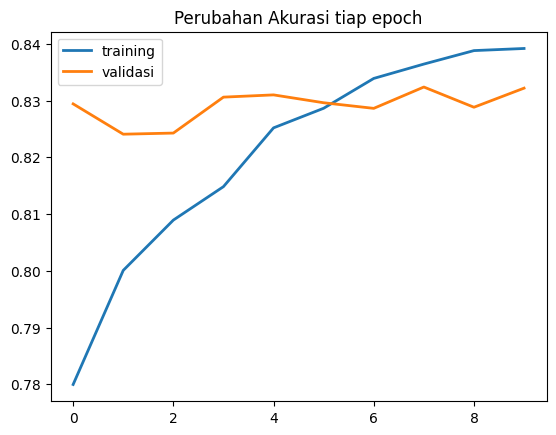

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.830914  0.835503  0.833202      2535
           1   0.833466  0.828832  0.831143      2518

    accuracy                       0.832179      5053
   macro avg   0.832190  0.832168  0.832173      5053
weighted avg   0.832186  0.832179  0.832176      5053



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2                  │ (None, 1, 3445)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │       1,829,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7532 - loss: 0.4993 - val_accuracy: 0.8217 - val_loss: 0.3705
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8082 - loss: 0.3867 - val_accuracy: 0.8235 - val_loss: 0.3710
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8123 - loss: 0.3740 - val_accuracy: 0.8187 - val_loss: 0.3630
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8193 - loss: 0.3644 - val_accuracy: 0.8227 - val_loss: 0.3562
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8201 - loss: 0.3585 - val_accuracy: 0.8298 - val_loss: 0.3490
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8304 - loss: 0.3459 - val_accuracy: 0.8280 - val_loss: 0.3484
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8338 - loss: 0.3361 - val_accuracy: 0.8290 - val_loss: 0.3499
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8371 - loss: 0.3

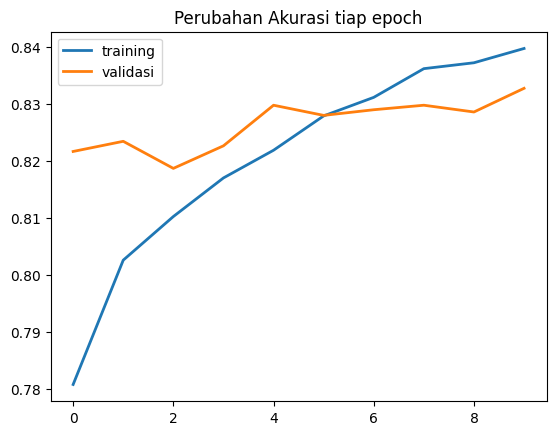

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.835317  0.830375  0.832839      2535
           1   0.830241  0.835187  0.832706      2518

    accuracy                       0.832773      5053
   macro avg   0.832779  0.832781  0.832773      5053
weighted avg   0.832788  0.832773  0.832773      5053



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_3                  │ (None, 1, 3445)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │       1,829,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7571 - loss: 0.4960 - val_accuracy: 0.8278 - val_loss: 0.3698
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8042 - loss: 0.3927 - val_accuracy: 0.8243 - val_loss: 0.3639
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8104 - loss: 0.3784 - val_accuracy: 0.8249 - val_loss: 0.3597
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8190 - loss: 0.3628 - val_accuracy: 0.8322 - val_loss: 0.3503
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8239 - loss: 0.3551 - val_accuracy: 0.8338 - val_loss: 0.3485
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8286 - loss: 0.3432 - val_accuracy: 0.8348 - val_loss: 0.3487
Epoch 7/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8316 - loss: 0.3415 - val_accuracy: 0.8304 - val_loss: 0.3487
Epoch 8/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8356 - loss: 0.3

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.844082  0.815779  0.829689      2535
           1   0.820592  0.848292  0.834212      2518

    accuracy                       0.831981      5053
   macro avg   0.832337  0.832036  0.831951      5053
weighted avg   0.832376  0.831981  0.831943      5053



In [22]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [23]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.8323108384458079
Average Precision : 0.8280996332942739
Average Recall    : 0.8374371194069368
Average F1-Score  : 0.8326871445522356
